In [50]:
# Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [51]:
# read df function
def read_data(path):
    """
    Reads a CSV file at the given path, removes any duplicate rows,
    and returns its contents as a pandas DataFrame.

    Parameters
    ----------
    path : str
        The sample data input path (csv format)

    Return
    ------
    df : pd.DataFrame
        The sample data input
    """
    # Read data
    df = pd.read_csv(path)

    # Validate
    print('Data shape:', df.shape)

    return df

### 2. Import the Data

In [52]:
# df name / Path
path = 'Fraud_Data.csv'

# Read the data
df = read_data(path = path)
df.head()

Data shape: (151112, 11)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [53]:
# Check Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


### 3. Feature Engineering

Add country column based on the IP address

In [54]:
# Get IP table df as reference
ip_table = pd.read_csv('IpAddress_to_Country.csv')

ip_table.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [55]:
ip_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [56]:
# Convert upperbound IP to float
ip_table['upper_bound_ip_address'] = ip_table['upper_bound_ip_address'].astype("float")

ip_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  float64
 2   country                 138846 non-null  object 
dtypes: float64(2), object(1)
memory usage: 3.2+ MB


In [57]:
# function that takes an IP address as input and returns the associated country based on IP_table df

def IP_to_country(ip) :
    try :
        return ip_table.country[(ip_table.lower_bound_ip_address < ip)                            
                                & 
                                (ip_table.upper_bound_ip_address > ip)].iloc[0]
    except IndexError :
        return "Unknown"

In [58]:
# Apply to original df
# The process is time consuming, you can skip this and use the "df_with_country.csv" instead

#df["IP_country"] = df.ip_address.apply(IP_to_country)

In [59]:
# Convert to new csv because the the above process is time consuming
# Don't run this code if you use the new df directly

#df.to_csv("df_with_country.csv")


In [60]:
# Check new csv with Ip country
df = pd.read_csv("df_with_country.csv")

df.drop(columns=['Unnamed: 0'], inplace= True)
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,IP_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States


In [61]:
# Check missing values
df.isna().any()

user_id           False
signup_time       False
purchase_time     False
purchase_value    False
device_id         False
source            False
browser           False
sex               False
age               False
ip_address        False
class             False
IP_country        False
dtype: bool

No missing values

Converting columns with date/time to Pandas datetime format

In [62]:
# Convert time series columns to separate time column 
import calendar

df.signup_time = pd.to_datetime(df.signup_time, format = '%Y-%m-%d %H:%M:%S')
df.purchase_time = pd.to_datetime(df.purchase_time, format = '%Y-%m-%d %H:%M:%S')

# Separate month,week,day,hour
# Column month
df["month_purchase"] = df.purchase_time.apply(lambda x: calendar.month_name[x.month])

# Column week
df["weekday_purchase"] = df.purchase_time.apply(lambda x: calendar.day_name[x.weekday()])

# Column hour_of_the_day
df["hour_purchase"] = df.purchase_time.apply(lambda x: x.hour)

# Column seconds_since_signup
df["seconds_since_signup"]= (df.purchase_time - df.signup_time).apply(lambda x : x.total_seconds())

In [63]:
# Sanity check
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,IP_country,month_purchase,weekday_purchase,hour_purchase,seconds_since_signup
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,April,Saturday,2,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,June,Monday,1,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,January,Thursday,18,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,May,Monday,13,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,September,Wednesday,18,4361461.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,March,Sunday,0,5261233.0
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,May,Tuesday,12,931270.0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,May,Wednesday,7,6681616.0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,September,Monday,9,5146119.0


Count how many countries accessed from one device ID

In [64]:
# Aggregate country and device ID
country_count = df.groupby(by =[ "device_id","IP_country"]).count().reset_index()

# Count how many different country in one device ID
country_count = pd.DataFrame(country_count.groupby(by="device_id").count().IP_country)

country_count.head()

,IP_country
device_id,
AAALBGNHHVMKG,1
AAAWIHVCQELTP,1
AAAXJHWCLISKY,1
AAAXXOZJRZRAO,1
AABFGRPBQHWFQ,1


In [65]:
# Merge to main df
df= df.merge(country_count, left_on="device_id", right_index=True)
df.rename(columns={"IP_country_x": "IP_country" , "IP_country_y":"countries_from_device"}, inplace = True)

# sanity check
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,IP_country,month_purchase,weekday_purchase,hour_purchase,seconds_since_signup,countries_from_device
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,April,Saturday,2,4506682.0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,June,Monday,1,17944.0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,January,Thursday,18,1.0,1
2626,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,January,Thursday,18,1.0,1
22106,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,January,Thursday,18,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151102,356404,2015-02-04 10:27:49,2015-05-07 19:37:56,41,FXBMCMIOLLNCJ,SEO,Chrome,M,26,1.827348e+09,0,United States,May,Thursday,19,7981807.0,1
151105,151643,2015-02-15 20:03:27,2015-05-07 19:28:52,23,THQOCEAVXXAIW,Ads,FireFox,M,18,1.691181e+09,0,United States,May,Thursday,19,6996325.0,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,May,Tuesday,12,931270.0,1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,May,Wednesday,7,6681616.0,1


In [66]:
# Check average fraud transaction for each country
risk_category = pd.DataFrame(df.groupby(['IP_country']).mean()['class'].sort_values(ascending=False))

risk_category

,class
IP_country,
Turkmenistan,1.000000
Namibia,0.434783
Sri Lanka,0.419355
Luxembourg,0.388889
Virgin Islands (U.S.),0.333333
...,...
Guadeloupe,0.000000
Gibraltar,0.000000
Ghana,0.000000


We can see that all transaction from Turkmenistan is fraud, we can flag countries like this as High risk

In [67]:
risk_category["risk_category"] = risk_category["class"].apply(lambda x : 
                                                           "Very High risk" if x > 0.25 else
                                                           "High risk" if x > 0.05 else
                                                           "Medium risk" if x > 0.01 else
                                                           "Low risk")

df = df.merge(risk_category.drop("class", axis = 1), left_on= "IP_country", right_index = True)

df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,IP_country,month_purchase,weekday_purchase,hour_purchase,seconds_since_signup,countries_from_device,risk_category
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,April,Saturday,2,4506682.0,1,High risk
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2.521871e+09,0,Japan,April,Thursday,17,5959702.0,1,High risk
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3.682312e+09,0,Japan,August,Monday,5,662649.0,1,High risk
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3.665105e+09,0,Japan,January,Monday,12,82537.0,2,High risk
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,7.359961e+08,0,Japan,September,Sunday,8,5951052.0,2,High risk


Categorize quick/slow purchase based on signup and first purchase

In [68]:
# Categorize if a purchase is quick based on time elapsed since signup
# The threshold is 30 seconds

df["quick_purchase"] = df.seconds_since_signup.apply(lambda x : "yes" if x < 30 else "no")

df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,IP_country,month_purchase,weekday_purchase,hour_purchase,seconds_since_signup,countries_from_device,risk_category,quick_purchase
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,April,Saturday,2,4506682.0,1,High risk,no
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2.521871e+09,0,Japan,April,Thursday,17,5959702.0,1,High risk,no
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3.682312e+09,0,Japan,August,Monday,5,662649.0,1,High risk,no
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3.665105e+09,0,Japan,January,Monday,12,82537.0,2,High risk,no
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,7.359961e+08,0,Japan,September,Sunday,8,5951052.0,2,High risk,no


Count how many times one device ID makes a purchase

In [69]:
# We generate a table indicating for each line if the couple device_id / purchase_value has duplicates
duplicate = df.duplicated(subset = ["purchase_value","device_id"], keep = False)

# We merge it with a DF containing purchase_value and device_id
duplicate = pd.concat([df.loc[:,["purchase_value","device_id"]], duplicate],axis=1)

# We build a DataFrame which gives us the number of duplicates for each combination of device_id / purchase_value
duplicate = duplicate.groupby(by = ["device_id","purchase_value"]).sum()

# We categorise number of time the same purchase has been made 
duplicate["freq_same_purchase"] = duplicate[0].apply(lambda x : 
                                                x if x < 5 else
                                                "5-10" if x<=10 else
                                                "11-15" if x<= 15 else
                                                ">15" 
                                               )



In [70]:
# Check the duplicate dataframe
duplicate.head()

,,0,freq_same_purchase
device_id,purchase_value,,
AAALBGNHHVMKG,45,0,0
AAAWIHVCQELTP,94,0,0
AAAXJHWCLISKY,46,0,0
AAAXXOZJRZRAO,57,11,11-15
AABFGRPBQHWFQ,10,0,0


In [71]:
# Merge the result with main dataset            
df = df.merge(duplicate.drop(0,axis=1), left_on=["device_id","purchase_value"], right_index = True)

df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,IP_country,month_purchase,weekday_purchase,hour_purchase,seconds_since_signup,countries_from_device,risk_category,quick_purchase,freq_same_purchase
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,April,Saturday,2,4506682.0,1,High risk,no,0
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2.521871e+09,0,Japan,April,Thursday,17,5959702.0,1,High risk,no,0
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3.682312e+09,0,Japan,August,Monday,5,662649.0,1,High risk,no,0
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3.665105e+09,0,Japan,January,Monday,12,82537.0,2,High risk,no,0
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,7.359961e+08,0,Japan,September,Sunday,8,5951052.0,2,High risk,no,0


In [187]:
df['freq_same_purchase'].value_counts()

0        142589
11-15      4401
5-10       2781
>15        1155
2           164
4            16
3             6
Name: freq_same_purchase, dtype: int64

Categorise Hour of the day

In [72]:
# Hour of the day categorisation
df["period_of_day"] = df.hour_purchase.apply(lambda x : 
                                                             "late night" if x < 4 else
                                                             "early morning" if x < 8 else
                                                             "morning" if x < 12 else
                                                             "early afternoon" if x < 16 else
                                                             "afternoon" if x < 20 else
                                                             "evening"
                                                            )

Binning the Age and Purchase value columns into categories

In [73]:
# Check the values
binning_cols = df[["age","purchase_value"]]

binning_cols

,age,purchase_value
0,39,34
32,32,72
40,44,52
104721,49,67
95129,34,33
...,...,...
124053,23,26
129630,34,12
133224,24,18
135193,30,45


In [74]:
# Create a function for binning the numerical predictor
def create_binning(data, predictor_label, num_of_bins):
    """
    Function for binning numerical predictor.

    Parameters
    ----------
    data : array like
      The name of dataset.

    predictor_label : object
      The label of predictor variable.

    num_of_bins : integer
      The number of bins.


    Return
    ------
    data : array like
      The name of transformed dataset.

    """
    # Create a new column containing the binned predictor
    data[predictor_label + "_bin"] = pd.qcut(data[predictor_label],
                                             q = num_of_bins)
    return data


In [75]:
for column in binning_cols:
  data_train_binned = create_binning(data = df,
                                     predictor_label = column,
                                     num_of_bins = 5)

In [76]:
# Sanity check
binned = df[['age_bin','purchase_value_bin']]
binned.head()

,age_bin,purchase_value_bin
0,"(35.0, 40.0]","(30.0, 40.0]"
32,"(30.0, 35.0]","(52.0, 154.0]"
40,"(40.0, 76.0]","(40.0, 52.0]"
104721,"(40.0, 76.0]","(52.0, 154.0]"
95129,"(30.0, 35.0]","(30.0, 40.0]"


In [77]:
# Convert to object dtypes
for col in binned :
    df[col] = df[col].astype(str)

In [78]:
df[['age_bin','purchase_value_bin']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 147638
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age_bin             151112 non-null  object
 1   purchase_value_bin  151112 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [79]:
# Selecting necessary columns
col = ["purchase_value_bin",
       "source",
       "browser",
       "age_bin",
       "month_purchase",
       "weekday_purchase",
       "period_of_day",
       "countries_from_device",
       "risk_category",
       "quick_purchase",
       "freq_same_purchase",
       "class"]

In [80]:
df_filtered = df[col]

df_filtered.head()

,purchase_value_bin,source,browser,age_bin,month_purchase,weekday_purchase,period_of_day,countries_from_device,risk_category,quick_purchase,freq_same_purchase,class
0,"(30.0, 40.0]",SEO,Chrome,"(35.0, 40.0]",April,Saturday,late night,1,High risk,no,0,0
32,"(52.0, 154.0]",Direct,Chrome,"(30.0, 35.0]",April,Thursday,afternoon,1,High risk,no,0,0
40,"(40.0, 52.0]",Direct,Chrome,"(40.0, 76.0]",August,Monday,early morning,1,High risk,no,0,0
104721,"(52.0, 154.0]",Direct,IE,"(40.0, 76.0]",January,Monday,early afternoon,2,High risk,no,0,0
95129,"(30.0, 40.0]",SEO,Chrome,"(30.0, 35.0]",September,Sunday,morning,2,High risk,no,0,0


In [81]:
df_filtered['countries_from_device'].value_counts()

1    141674
2      9286
3       148
4         4
Name: countries_from_device, dtype: int64

#### 3.2. Exploratory Data Analysis

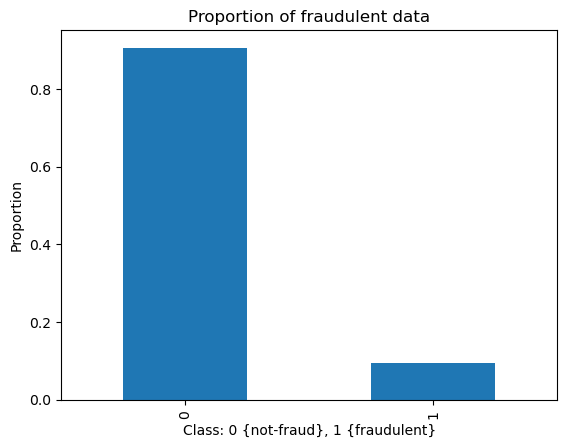

In [198]:
# Plot
(
    df_filtered["class"]
    .value_counts(normalize = True)
    .plot
    .bar()
)

plt.xlabel("Class: 0 {not-fraud}, 1 {fraudulent}")
plt.ylabel("Proportion")
plt.title("Proportion of fraudulent data")
plt.show()

[Text(0, 0, '136961'), Text(0, 0, '14151')]

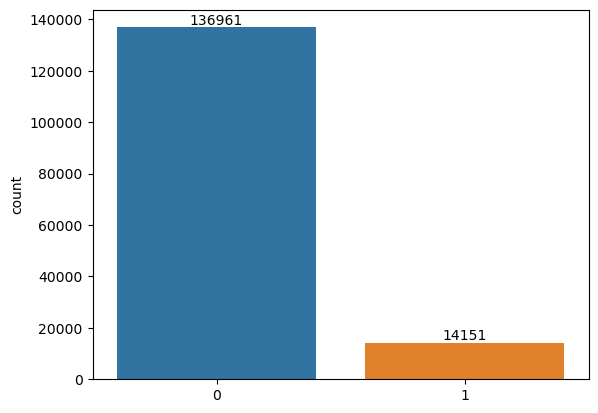

In [197]:
# Check distribution of our label data
ax = sns.countplot(data = df_filtered, x = df_filtered['class'].values, label = y_train.unique())
ax.bar_label(ax.containers[0])

Target data is not imbalanced, might need to do balancing later

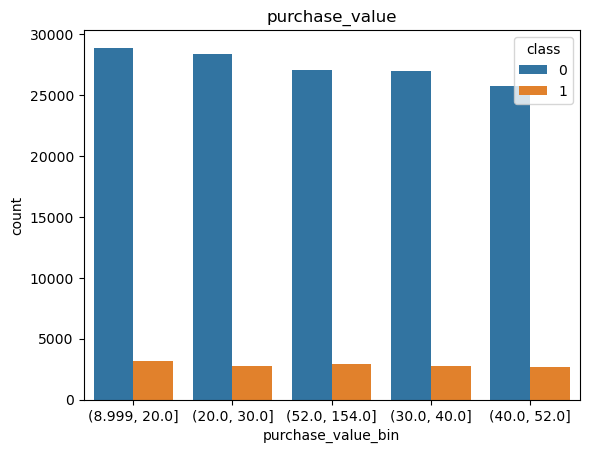

In [83]:
# Visualize the AccidentArea
sns.countplot(data = df_filtered,
              x = "purchase_value_bin",
              hue= 'class',
              order=df_filtered['purchase_value_bin'].value_counts(ascending=False).index
              )



plt.title("purchase_value")
plt.show()

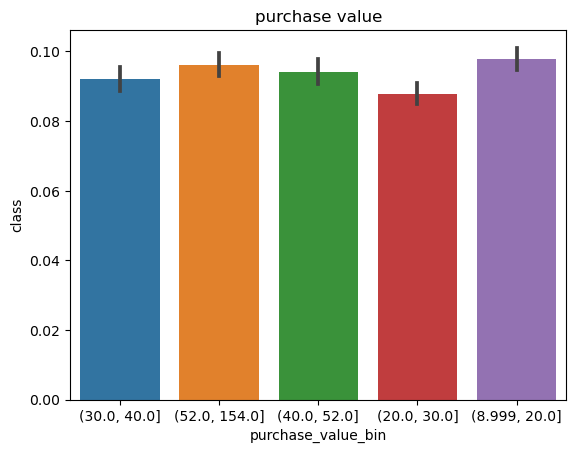

In [175]:
sns.barplot(data = df_filtered,
            x = "purchase_value_bin",
            y = "class"
            )

plt.title("purchase value")
plt.show()

- Most transaction are in 9-20 dollar range
- Fraud transaction in each purchase category have minimal difference

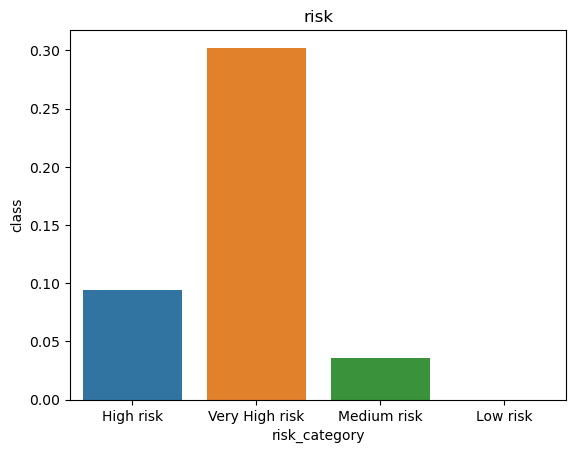

In [176]:
sns.barplot(data = df_filtered,
            x = "risk_category",
            y = "class", ci=None
            )


plt.title("risk")
plt.show()

- As expected, transaction from Very High Risk country has the most probability to be a fraud transaction

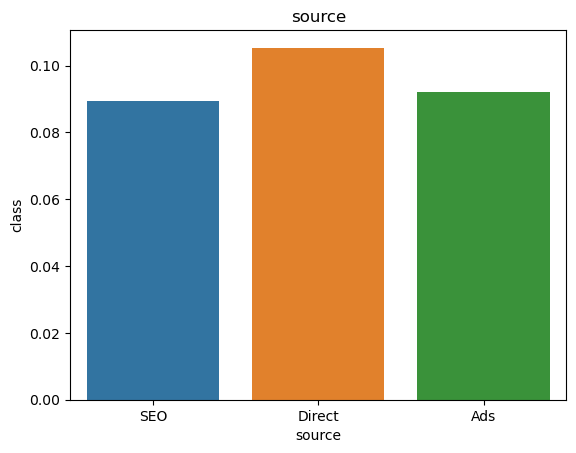

In [184]:

sns.barplot(data = df_filtered,
            x = "source",
            y = "class", ci=None,
            )
            


plt.title("source")
plt.show()

- Transaction from direct sources have the most probability to be a fraud transaction

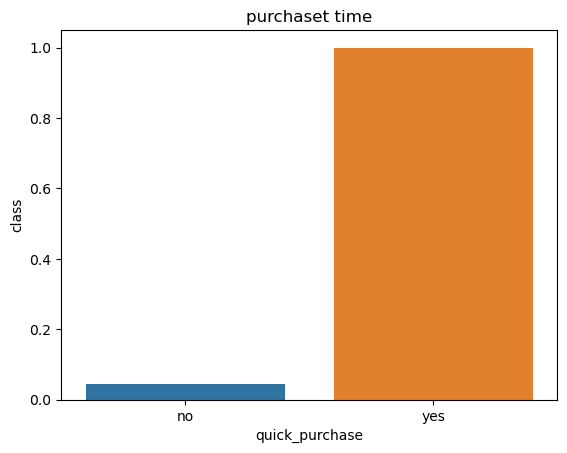

In [182]:

sns.barplot(data = df_filtered,
            x = "quick_purchase",
            y = "class", ci=None,
            )
            


plt.title("purchase time")
plt.show()

<AxesSubplot:xlabel='freq_same_purchase', ylabel='class'>

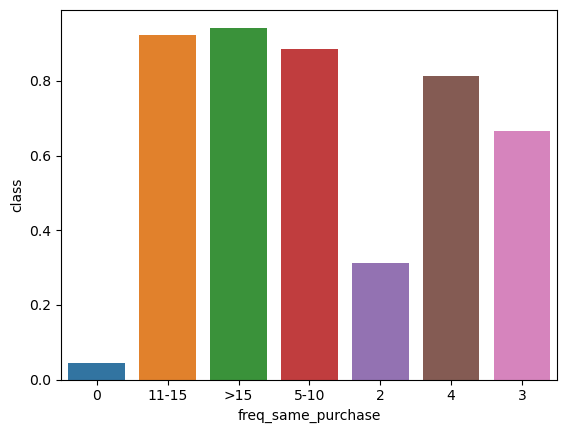

In [186]:

sns.barplot(data = df_filtered,
            x = "freq_same_purchase",
            y = "class", ci=None,
            )
            


- IDs that purchase 11 items of the same value or more have the most probability of being a fraud transaction


Purchase value

### 4. Splitting Data

- Our objective is to classify unseen transactions data, thus we need to make sure that we do not leak unseen transactions data during training.
- Our tasks:
  1. Split into `input` (`X`) and `output` (`y`)
  2. Split into `train` (60% data), `valid` (20% data), and `test` (20% data).
    - `train` data: will be used to build the model
    - `validation` data: will be used to choose the best model
    - `test` data: will be used for final evaluation

Split input-output

In [88]:
# function split input and output
def split_input_output(data, target_column):
    """
    Function to split input (x) and output (y)

    Parameters
    ----------
    data : pd.DataFrame
        The sample data input

    target_column : str
        The output column name

    Return
    ------
    X : pd.DataFrame
        input data

    y : pd.DataFrame
        output data
    """
    X = data.drop(columns = target_column)
    y = data[target_column]

    # Validate
    print('X shape:', X.shape)
    print('y shape :', y.shape)

    return X, y


In [89]:
# Split input x and output y
X, y = split_input_output(data = df_filtered,
                          target_column = "class")

# Show 5 first rows of input
X.head()

X shape: (151112, 11)
y shape : (151112,)


,purchase_value_bin,source,browser,age_bin,month_purchase,weekday_purchase,period_of_day,countries_from_device,risk_category,quick_purchase,freq_same_purchase
0,"(30.0, 40.0]",SEO,Chrome,"(35.0, 40.0]",April,Saturday,late night,1,High risk,no,0
32,"(52.0, 154.0]",Direct,Chrome,"(30.0, 35.0]",April,Thursday,afternoon,1,High risk,no,0
40,"(40.0, 52.0]",Direct,Chrome,"(40.0, 76.0]",August,Monday,early morning,1,High risk,no,0
104721,"(52.0, 154.0]",Direct,IE,"(40.0, 76.0]",January,Monday,early afternoon,2,High risk,no,0
95129,"(30.0, 40.0]",SEO,Chrome,"(30.0, 35.0]",September,Sunday,morning,2,High risk,no,0


In [90]:
# Show 5 first rows of output
y.head()

0         0
32        0
40        0
104721    0
95129     0
Name: class, dtype: int64

Validate data dimension

In [91]:
# check data dimension
n_samples, n_features = X.shape

# print number samples and features
print(f"Number of samples  : {n_samples}")
print(f"Number of features : {n_features}")

Number of samples  : 151112
Number of features : 11


In [92]:
# check data features name
features_names = X.columns

# print name of features
print(f"name of features : {features_names}")

name of features : Index(['purchase_value_bin', 'source', 'browser', 'age_bin', 'month_purchase',
       'weekday_purchase', 'period_of_day', 'countries_from_device',
       'risk_category', 'quick_purchase', 'freq_same_purchase'],
      dtype='object')


Split Train, Validate, Test

In [93]:
from sklearn.model_selection import train_test_split

def split_train_valid_test(X, y, test_size, valid_size, stratify, random_state=42):
    """
    Split data into train & test

    Parameters
    ----------
    X : pd.DataFrame
        The input data

    y : pd.Series
        The output data

    test_size : float
        The proportion of number of test data to total data

    valid_size : float
        The proportion of number of validation data to total data

    stratify : pd.Series
        Reference to stratify the splitting

    random_state : int, default=42
        The random seed, for reproducibility

    Returns
    -------
    X_train : pd.DataFrame
        The input train data

    X_test : pd.DataFrame
        The input test data

    y_train : pd.Series
        The output train data

    y_test : pd.Series
        The output test data
    """
    # Split the data
    X_train, X_not_train, y_train, y_not_train = train_test_split(
        X,
        y,
        test_size = test_size + valid_size,
        stratify = stratify,
        random_state = random_state
    )

    # Then, split valid and test from not_train
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_not_train,
        y_not_train,
        test_size = valid_size/(test_size + valid_size),
        stratify = y_not_train,
        random_state = random_state
    )

    # Validate
    print('X train shape:', X_train.shape)
    print('y train shape:', y_train.shape)
    print('X valid shape :', X_valid.shape)
    print('y valid shape :', y_valid.shape)
    print('X test shape :', X_test.shape)
    print('y test shape :', y_test.shape)

    return X_train, X_valid, X_test, y_train, y_valid, y_test


In [94]:
# Run the code
splitted_data = split_train_valid_test(
    X = X,
    y = y,
    test_size = 0.2,
    valid_size = 0.2,
    stratify = y,
    random_state = 42
)

X_train, X_valid, X_test, y_train, y_valid, y_test = splitted_data

X train shape: (90667, 11)
y train shape: (90667,)
X valid shape : (30222, 11)
y valid shape : (30222,)
X test shape : (30223, 11)
y test shape : (30223,)


**Summary**
- Now we have training, validation and testing data
  - test_size = 20% from original data,
  - validation_size = 20% from original data,
  - train_size = 60% from original data

### 5. Preprocessing Data

5.1. Split numerical and categorical data

In [95]:
# define numerical data
NUM_COLS = ['purchase_value_bin', 'age_bin', 'period_of_day',
            'countries_from_device', 'freq_same_purchase','month_purchase',
            'weekday_purchase']
# define categorical
CAT_COLS = ['source', 'browser', 'risk_category',"quick_purchase"]

In [96]:
# split
X_train_num = X_train[NUM_COLS]
X_train_cat = X_train[CAT_COLS]

In [97]:
X_train_cat.head()

,source,browser,risk_category,quick_purchase
106169,Ads,Safari,High risk,no
3943,SEO,FireFox,High risk,no
103384,SEO,Safari,High risk,no
35987,Ads,Safari,High risk,no
73169,Direct,Chrome,High risk,no


In [98]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90667 entries, 106169 to 63349
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   purchase_value_bin     90667 non-null  object
 1   age_bin                90667 non-null  object
 2   period_of_day          90667 non-null  object
 3   countries_from_device  90667 non-null  int64 
 4   freq_same_purchase     90667 non-null  object
 5   month_purchase         90667 non-null  object
 6   weekday_purchase       90667 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.5+ MB


5.2. Encode categorical data

In [99]:
# initiate encoder
encoder = OneHotEncoder(drop='if_binary',           # If the value is only 2, drop one
                        handle_unknown='ignore')    # If something is not recognized, 0 is all

In [100]:
# Fit encoder to categorical data in train data
encoder.fit(X_train_cat)

OneHotEncoder(drop='if_binary', handle_unknown='ignore')

In [101]:
# result encoder: feature name example
encoder.get_feature_names_out()

array(['source_Ads', 'source_Direct', 'source_SEO', 'browser_Chrome',
       'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari',
       'risk_category_High risk', 'risk_category_Low risk',
       'risk_category_Medium risk', 'risk_category_Very High risk',
       'quick_purchase_yes'], dtype=object)

In [102]:
# Transform
X_train_cat_enc = pd.DataFrame(
    encoder.transform(X_train_cat).toarray(),
    columns = encoder.get_feature_names_out(),
    index = X_train_cat.index
)

X_train_cat_enc.head()

,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,risk_category_High risk,risk_category_Low risk,risk_category_Medium risk,risk_category_Very High risk,quick_purchase_yes
106169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3943,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
103384,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
35987,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
73169,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [103]:
df[['month_purchase']].value_counts()

month_purchase
July              19507
May               19364
June              18908
August            18662
April             16551
September         14347
March             12090
January           10097
October            9815
February           6449
November           4743
December            579
dtype: int64

5.3. Transform - convert categorical into numerical with ordered values

In [104]:
df_filtered[['freq_same_purchase']].value_counts()

freq_same_purchase
0                     142589
11-15                   4401
5-10                    2781
>15                     1155
2                        164
4                         16
3                          6
dtype: int64

In [105]:
df_filtered[['purchase_value_bin']].value_counts()

purchase_value_bin
(8.999, 20.0]         32014
(20.0, 30.0]          31102
(52.0, 154.0]         29965
(30.0, 40.0]          29664
(40.0, 52.0]          28367
dtype: int64

In [106]:
df_filtered[['age_bin']].value_counts()

age_bin       
(30.0, 35.0]      32389
(17.999, 25.0]    31557
(25.0, 30.0]      30433
(40.0, 76.0]      30122
(35.0, 40.0]      26611
dtype: int64

In [107]:
df_filtered[['weekday_purchase']].value_counts()

weekday_purchase
Sunday              22015
Monday              21711
Saturday            21648
Thursday            21586
Friday              21522
Wednesday           21316
Tuesday             21314
dtype: int64

In [108]:
df_filtered[['period_of_day']].value_counts()

period_of_day  
early afternoon    25419
afternoon          25326
morning            25232
late night         25210
evening            25125
early morning      24800
dtype: int64

In [109]:
X_train[['freq_same_purchase']].value_counts()

freq_same_purchase
0                     85527
11-15                  2653
5-10                   1674
>15                     697
2                       103
4                         7
3                         6
dtype: int64

In [110]:
def transformFrequency(data):
    freq_list = ["0", "2", "3", "4", "5-10", "11-15",">15"]

    number_list = [i for i in range(len(freq_list))]

    data["freq_same_purchase"] = data["freq_same_purchase"].replace(freq_list, number_list)

    return data

In [111]:
def transformPeriod(data):
    period_list = ["early morning", "morning", "early afternoon", "afternoon", "evening", "late night"]

    number_list = [i for i in range(len(period_list))]

    data["period_of_day"] = data["period_of_day"].replace(period_list, number_list)

    return data

In [112]:
def transformMonth(data):
    month_list = ["January", "February", "March", "April", "May", "June",
                 "July", "August", "September", "October", "November","December"]

    number_list = [i for i in range(len(month_list))]

    data["month_purchase"] = data["month_purchase"].replace(month_list, number_list)

    return data

In [113]:
def transformWeek(data):
    week_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday",
                 "Sunday"]

    number_list = [i for i in range(len(week_list))]

    data["weekday_purchase"] = data["weekday_purchase"].replace(week_list, number_list)

    return data

In [114]:
def transformPurchaseValue(data):
    purchase_list = ["(8.999, 20.0]", "(20.0, 30.0]", "(30.0, 40.0]","(40.0, 52.0]","(52.0, 154.0]"]

    number_list = [i for i in range(len(purchase_list))]

    data["purchase_value_bin"] = data["purchase_value_bin"].replace(purchase_list, number_list)

    return data

In [115]:
def transformAge(data):
    age_list = ["(17.999, 25.0]", "(25.0, 30.0]", "(30.0, 35.0]", "(35.0, 40.0]",
                  "(40.0, 76.0]"]

    number_list = [i for i in range(len(age_list))]

    data["age_bin"] = data["age_bin"].replace(age_list, number_list)

    return data

In [116]:
X_train[NUM_COLS].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90667 entries, 106169 to 63349
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   purchase_value_bin     90667 non-null  object
 1   age_bin                90667 non-null  object
 2   period_of_day          90667 non-null  object
 3   countries_from_device  90667 non-null  int64 
 4   freq_same_purchase     90667 non-null  object
 5   month_purchase         90667 non-null  object
 6   weekday_purchase       90667 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.5+ MB


In [117]:
X_train['purchase_value_bin'].value_counts()

(8.999, 20.0]    19288
(20.0, 30.0]     18604
(52.0, 154.0]    17958
(30.0, 40.0]     17830
(40.0, 52.0]     16987
Name: purchase_value_bin, dtype: int64

In [118]:
X_train['risk_category'].value_counts()

High risk         89083
Medium risk        1015
Low risk            307
Very High risk      262
Name: risk_category, dtype: int64

In [119]:
X_train[NUM_COLS] = transformPeriod(data = X_train[NUM_COLS])
X_train[NUM_COLS] = transformMonth(data = X_train[NUM_COLS])
X_train[NUM_COLS] = transformWeek(data = X_train[NUM_COLS])
X_train[NUM_COLS] = transformPurchaseValue(data = X_train[NUM_COLS])
X_train[NUM_COLS] = transformAge(data = X_train[NUM_COLS])
X_train[NUM_COLS] = transformFrequency(data = X_train[NUM_COLS])

C:\Users\Mint_01\AppData\Local\Temp\ipykernel_9240\240902217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["period_of_day"] = data["period_of_day"].replace(period_list, number_list)
C:\Users\Mint_01\AppData\Local\Temp\ipykernel_9240\1618671104.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month_purchase"] = data["month_purchase"].replace(month_list, number_list)
C:\Users\Mint_01\AppData\Local\Temp\ipykernel_9240\790265323.py:7: SettingWithCopyWarning: 
A value is trying to be set on a

In [120]:
X_train[NUM_COLS].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90667 entries, 106169 to 63349
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   purchase_value_bin     90667 non-null  int64
 1   age_bin                90667 non-null  int64
 2   period_of_day          90667 non-null  int64
 3   countries_from_device  90667 non-null  int64
 4   freq_same_purchase     90667 non-null  int64
 5   month_purchase         90667 non-null  int64
 6   weekday_purchase       90667 non-null  int64
dtypes: int64(7)
memory usage: 5.5 MB


In [121]:
X_train[NUM_COLS]

,purchase_value_bin,age_bin,period_of_day,countries_from_device,freq_same_purchase,month_purchase,weekday_purchase
106169,0,2,1,2,0,7,6
3943,4,2,1,1,0,6,3
103384,1,3,2,1,0,8,2
35987,0,1,0,1,0,5,0
73169,4,1,4,1,0,5,4
...,...,...,...,...,...,...,...
94802,1,3,1,1,0,2,5
90406,2,4,3,1,0,6,5
13842,0,1,0,1,0,4,3
36063,4,1,1,1,0,3,0


#### 5.4. Combine Categorical and Numerical

In [122]:
# Join data
X_train_concat = pd.concat((X_train[NUM_COLS].copy(), X_train_cat_enc), axis=1)

# Validate
print('Data shape:', X_train_concat.shape)
X_train_concat.T

Data shape: (90667, 20)


,106169,3943,103384,35987,73169,80125,64246,102458,48394,1388,...,146322,16631,33365,76108,98156,94802,90406,13842,36063,63349
purchase_value_bin,0.0,4.0,1.0,0.0,4.0,4.0,1.0,2.0,3.0,0.0,...,3.0,1.0,3.0,4.0,1.0,1.0,2.0,0.0,4.0,2.0
age_bin,2.0,2.0,3.0,1.0,1.0,4.0,3.0,3.0,4.0,4.0,...,4.0,1.0,3.0,2.0,0.0,3.0,4.0,1.0,1.0,3.0
period_of_day,1.0,1.0,2.0,0.0,4.0,2.0,2.0,3.0,5.0,5.0,...,4.0,1.0,3.0,0.0,1.0,1.0,3.0,0.0,1.0,2.0
countries_from_device,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
freq_same_purchase,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_purchase,7.0,6.0,8.0,5.0,5.0,4.0,4.0,8.0,1.0,6.0,...,3.0,4.0,3.0,4.0,9.0,2.0,6.0,4.0,3.0,8.0
weekday_purchase,6.0,3.0,2.0,0.0,4.0,1.0,4.0,0.0,5.0,0.0,...,4.0,1.0,6.0,2.0,6.0,5.0,5.0,3.0,0.0,6.0
source_Ads,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
source_Direct,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
source_SEO,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


#### 5.4. Data Balancing

In [123]:
# Check training set
print('data_train old shape:', X_train_concat.shape)

data_train old shape: (90667, 20)


In [124]:
# Check the counts of response variable
y_train.value_counts()

0    82176
1     8491
Name: class, dtype: int64

The proportion is imbalanced, we will try balancing it with Random Undersampling and Oversampling

<AxesSubplot:xlabel='class', ylabel='count'>

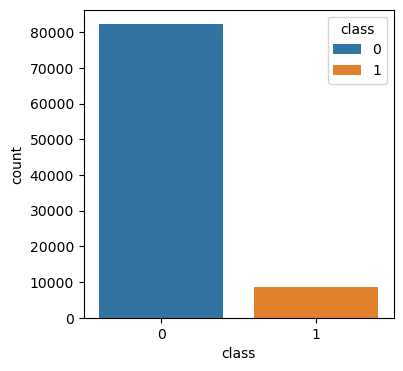

In [125]:
# Check the proportion before RUS
fig, ax = plt.subplots(figsize=(4, 4))

sns.countplot(x = y_train,
              hue = y_train,
              dodge = False)

In [126]:
# Install imblearn
# !pip install imblearn

##### Random Undersampler

In [127]:
from imblearn.under_sampling import RandomUnderSampler

def rus_fit_resample(x, y):

    # Create copy of set data
    x = x.copy()
    y = y.copy()

    # Create sampling object
    rus = RandomUnderSampler(random_state = 42)

    # Balancing data set
    x_rus, y_rus = rus.fit_resample(x, y)

    # Return balanced data set
    return x_rus, y_rus

In [128]:
# Perform RUS
x_rus, y_rus = rus_fit_resample(x = X_train_concat,
                                y = y_train)

<AxesSubplot:xlabel='class', ylabel='count'>

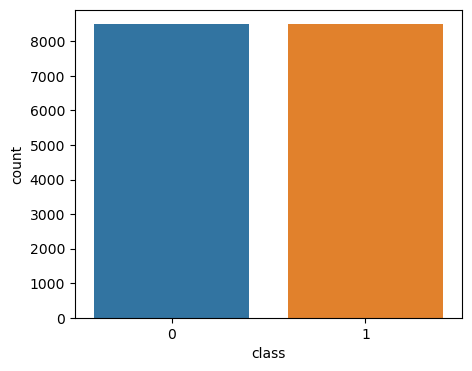

In [129]:
# Check the proportion of response categories
fig, ax = plt.subplots(figsize=(5, 4))

sns.countplot(x = y_rus,
              dodge = False)



In [130]:
# Check the balanced response
y_rus.value_counts()

0    8491
1    8491
Name: class, dtype: int64

##### Random Oversampler

In [131]:
from imblearn.over_sampling import RandomOverSampler

def ros_fit_resample(x,y):

    # Create copy of set data
    x = x.copy()
    y = y.copy()

    # Create sampling object
    ros = RandomOverSampler(random_state = 42)

    # Balancing data set
    x_ros, y_ros = ros.fit_resample(x, y)

    # Return balanced data set
    return x_ros, y_ros

In [132]:
# Perform ROS
x_ros, y_ros = ros_fit_resample(x = X_train_concat,
                                  y = y_train)

<AxesSubplot:xlabel='class', ylabel='count'>

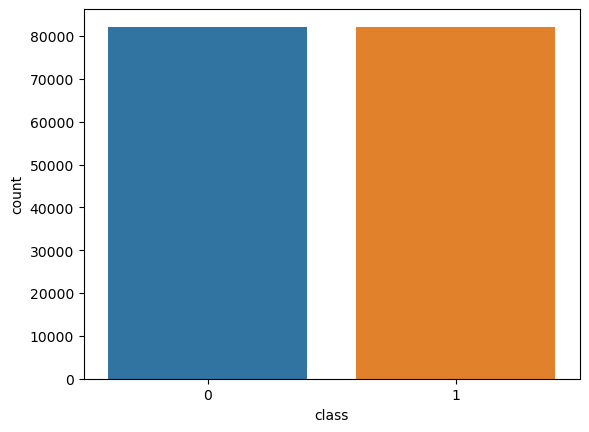

In [133]:
# Check the proportion of response categories
sns.countplot(x = y_ros,
              dodge = False)

In [134]:
# Check the balanced response
y_ros.value_counts()

0    82176
1    82176
Name: class, dtype: int64

### 6. Modeling

In [135]:
# Import model

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


# Model performance & evalutaion libraries
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import metrics

#### 6.1. Original Train data

In [136]:
model_dict = {
    'baseline': DummyClassifier(),
    'logistic regression': LogisticRegression(max_iter = 500),
    'decision tree': DecisionTreeClassifier(random_state=42),
    'random forest': RandomForestClassifier(random_state=42),
    'adaboost' : AdaBoostClassifier(random_state=42)
}

hyperparam_dict = {
    'baseline': {'strategy':['most_frequent']},
    'logistic regression': {},
    'decision tree': {'max_depth': [5, 10, 20, 30]},
    'random forest': {'n_estimators': [100, 300, 500]},
    'adaboost': {'algorithm':['SAMME','SAMME.R'], 'n_estimators':[50, 100]}
}

##### 6.1.1. Hyperparameter Tuning

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
# Perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    # Log
    print('start modeling', model_name)

    cv_ = GridSearchCV(estimator = model_dict[model_name],
                       param_grid = hyperparam_dict[model_name],
                       cv = 5,
                       scoring = 'roc_auc',
                       return_train_score = True,
                       verbose = 3,
                       n_jobs=-1)
    cv_.fit(X_train_concat, y_train)

    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_

    # append
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)

    # log
    print('finish modeling', model_name)
    print('')

start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
finish modeling logistic regression

start modeling decision tree
Fitting 5 folds for each of 4 candidates, totalling 20 fits
finish modeling decision tree

start modeling random forest
Fitting 5 folds for each of 3 candidates, totalling 15 fits
finish modeling random forest

start modeling adaboost
Fitting 5 folds for each of 4 candidates, totalling 20 fits
finish modeling adaboost



In [139]:
summ_exp = pd.DataFrame(
    {'Model': models,
     'AUC Train': auc_trains,
     'AUC Test': auc_tests,
     'Best Param': best_params}
)

summ_exp

,Model,AUC Train,AUC Test,Best Param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.838834,0.834960,{}
2,decision tree,0.839965,0.832795,{'max_depth': 5}
3,random forest,0.998813,0.826799,{'n_estimators': 300}
4,adaboost,0.832976,0.832975,"{'algorithm': 'SAMME', 'n_estimators': 50}"


##### 6.1.2. Use the best parameters on each model

In [140]:
dt_best = DecisionTreeClassifier(max_depth = 5)
dt_best.fit(X_train_concat, y_train)

lr_best = LogisticRegression()
lr_best.fit(X_train_concat, y_train)

rf_best = RandomForestClassifier(n_estimators = 300)
rf_best.fit(X_train_concat, y_train)

ada_best = AdaBoostClassifier(algorithm= 'SAMME', n_estimators= 5)
ada_best.fit(X_train_concat, y_train)

c:\Users\Mint_01\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoostClassifier(algorithm='SAMME', n_estimators=5)

#### 6.2. Undersampled Data

In [141]:
model_dict = {
    'baseline': DummyClassifier(),
    'logistic regression': LogisticRegression(max_iter = 500),
    'decision tree': DecisionTreeClassifier(random_state=42),
    'random forest': RandomForestClassifier(random_state=42),
    'adaboost' : AdaBoostClassifier(random_state=42)
}

hyperparam_dict = {
    'baseline': {'strategy':['most_frequent']},
    'logistic regression': {},
    'decision tree': {'max_depth': [5, 10, 20, 30]},
    'random forest': {'n_estimators': [100, 300, 500]},
    'adaboost': {'algorithm':['SAMME','SAMME.R'], 'n_estimators':[50, 100]}
}

##### 6.2.1. Hyperparameter Tuning

In [142]:
# Perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    # Log
    print('start modeling', model_name)

    cv_ = GridSearchCV(estimator = model_dict[model_name],
                       param_grid = hyperparam_dict[model_name],
                       cv = 5,
                       scoring = 'roc_auc',
                       return_train_score = True,
                       verbose = 3,
                       n_jobs=-1)
    cv_.fit(x_rus, y_rus)

    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_

    # append
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)

    # log
    print('finish modeling', model_name)
    print('')

start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
finish modeling logistic regression

start modeling decision tree
Fitting 5 folds for each of 4 candidates, totalling 20 fits
finish modeling decision tree

start modeling random forest
Fitting 5 folds for each of 3 candidates, totalling 15 fits
finish modeling random forest

start modeling adaboost
Fitting 5 folds for each of 4 candidates, totalling 20 fits
finish modeling adaboost



In [143]:
x_rus.head()

,purchase_value_bin,age_bin,period_of_day,countries_from_device,freq_same_purchase,month_purchase,weekday_purchase,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,risk_category_High risk,risk_category_Low risk,risk_category_Medium risk,risk_category_Very High risk,quick_purchase_yes
66605,3,2,1,1,0,8,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
83804,2,3,0,1,0,6,6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
122805,0,0,1,1,0,5,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
139848,2,2,4,1,0,7,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24907,4,3,3,1,0,7,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##### 6.2.2. Best Parameters

In [144]:
summ_exp = pd.DataFrame(
    {'Model': models,
     'AUC Train': auc_trains,
     'AUC Test': auc_tests,
     'Best Param': best_params}
)

summ_exp

,Model,AUC Train,AUC Test,Best Param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.839560,0.833422,{}
2,decision tree,0.840073,0.835783,{'max_depth': 5}
3,random forest,0.999779,0.831759,{'n_estimators': 500}
4,adaboost,0.832372,0.832767,"{'algorithm': 'SAMME.R', 'n_estimators': 50}"


In [145]:
dt_best_rus = DecisionTreeClassifier(max_depth = 5)
dt_best_rus.fit(X_train_concat, y_train)

lr_best_rus = LogisticRegression()
lr_best_rus.fit(X_train_concat, y_train)

rf_best_rus = RandomForestClassifier(n_estimators = 300)
rf_best_rus.fit(X_train_concat, y_train)

ada_best_rus = AdaBoostClassifier(algorithm= 'SAMME', n_estimators= 5)
ada_best_rus.fit(X_train_concat, y_train)

c:\Users\Mint_01\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoostClassifier(algorithm='SAMME', n_estimators=5)

#### 6.3. Oversampled Data

In [146]:
# Perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    # Log
    print('start modeling', model_name)

    cv_ = GridSearchCV(estimator = model_dict[model_name],
                       param_grid = hyperparam_dict[model_name],
                       cv = 5,
                       scoring = 'roc_auc',
                       return_train_score = True,
                       verbose = 3,
                       n_jobs = -1)
    cv_.fit(x_ros, y_ros)

    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_

    # append
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)

    # log
    print('finish modeling', model_name)
    print('')

start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\Mint_01\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finish modeling logistic regression

start modeling decision tree
Fitting 5 folds for each of 4 candidates, totalling 20 fits
finish modeling decision tree

start modeling random forest
Fitting 5 folds for each of 3 candidates, totalling 15 fits
finish modeling random forest

start modeling adaboost
Fitting 5 folds for each of 4 candidates, totalling 20 fits
finish modeling adaboost



##### 6.3.1. Best Parameters

In [147]:
sum_exp = pd.DataFrame(
    {'model': models,
     'AUC train': auc_trains,
     'AUC test': auc_tests,
     'Best param': best_params}
)

sum_exp

,model,AUC train,AUC test,Best param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.838853,0.838443,{}
2,decision tree,0.839806,0.971854,{'max_depth': 30}
3,random forest,0.998702,0.993271,{'n_estimators': 500}
4,adaboost,0.832855,0.841358,"{'algorithm': 'SAMME.R', 'n_estimators': 50}"


In [148]:
dt_best_ros = DecisionTreeClassifier(max_depth = 5)
dt_best_ros.fit(X_train_concat, y_train)

lr_best_ros = LogisticRegression()
lr_best_ros.fit(X_train_concat, y_train)

rf_best_ros = RandomForestClassifier(n_estimators = 300)
rf_best_ros.fit(X_train_concat, y_train)

ada_best_ros = AdaBoostClassifier(algorithm= 'SAMME', n_estimators= 5)
ada_best_ros.fit(X_train_concat, y_train)

c:\Users\Mint_01\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoostClassifier(algorithm='SAMME', n_estimators=5)

### 7. Prediction

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay

In [150]:
# Split cat & num
X_valid_num = X_valid[NUM_COLS]
X_valid_cat = X_valid[CAT_COLS]

# Encode cat
X_valid_cat_enc = pd.DataFrame(
    encoder.transform(X_valid_cat).toarray(),
    index = X_valid_cat.index,
    columns = encoder.get_feature_names_out()
)

X_valid_num = transformPeriod(data = X_valid_num)
X_valid_num = transformMonth(data = X_valid_num)
X_valid_num = transformWeek(data = X_valid_num)
X_valid_num = transformPurchaseValue(data = X_valid_num)
X_valid_num = transformAge(data = X_valid_num)
X_valid_num = transformFrequency(data = X_valid_num)

# Concat
X_valid_concat = pd.concat((X_valid_num, X_valid_cat_enc), axis=1)
X_valid_concat

C:\Users\Mint_01\AppData\Local\Temp\ipykernel_9240\240902217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["period_of_day"] = data["period_of_day"].replace(period_list, number_list)
C:\Users\Mint_01\AppData\Local\Temp\ipykernel_9240\1618671104.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month_purchase"] = data["month_purchase"].replace(month_list, number_list)


,purchase_value_bin,age_bin,period_of_day,countries_from_device,freq_same_purchase,month_purchase,weekday_purchase,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,risk_category_High risk,risk_category_Low risk,risk_category_Medium risk,risk_category_Very High risk,quick_purchase_yes
37679,2,3,4,1,0,7,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
125865,0,4,1,1,0,5,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19340,2,2,3,2,0,8,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
54773,2,1,1,1,0,10,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12407,2,0,1,1,0,8,6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587,3,3,3,1,0,10,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
120648,3,0,3,1,0,11,4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
141128,4,4,0,1,0,8,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
95242,0,0,4,1,0,6,4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [151]:
# Split cat & num
X_test_num = X_test[NUM_COLS]
X_test_cat = X_test[CAT_COLS]

# Encode cat
X_test_cat_enc = pd.DataFrame(
    encoder.transform(X_test_cat).toarray(),
    index = X_test_cat.index,
    columns = encoder.get_feature_names_out()
)

X_test_num = transformPeriod(data = X_test_num)
X_test_num = transformMonth(data = X_test_num)
X_test_num = transformWeek(data = X_test_num)
X_test_num = transformPurchaseValue(data = X_test_num)
X_test_num = transformAge(data = X_test_num)
X_test_num = transformFrequency(data = X_test_num)

# Concat
X_test_concat = pd.concat((X_test_num, X_test_cat_enc), axis=1)
X_test_concat

C:\Users\Mint_01\AppData\Local\Temp\ipykernel_9240\240902217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["period_of_day"] = data["period_of_day"].replace(period_list, number_list)
C:\Users\Mint_01\AppData\Local\Temp\ipykernel_9240\1618671104.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month_purchase"] = data["month_purchase"].replace(month_list, number_list)


,purchase_value_bin,age_bin,period_of_day,countries_from_device,freq_same_purchase,month_purchase,weekday_purchase,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,risk_category_High risk,risk_category_Low risk,risk_category_Medium risk,risk_category_Very High risk,quick_purchase_yes
34470,0,0,1,1,0,3,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16755,2,3,5,1,0,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
108216,0,3,5,1,0,7,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
146648,0,1,5,1,0,3,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
122976,2,1,4,1,0,3,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85593,2,0,4,2,0,8,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58857,2,3,2,2,0,9,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
134941,1,4,2,1,0,7,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
80151,0,0,4,2,0,7,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### 7.2. Prediction on Validation Set

In [152]:
from sklearn.metrics import roc_auc_score

# Create list of models and training types
model = ["Logistic Regression", "Decision Tree", "Random Forest", "Adaboost"]

training_set = ["Original","RUS","ROS"]

# Create dataframe
auc_valid = pd.DataFrame(index = training_set, columns = model)
auc_valid

,Logistic Regression,Decision Tree,Random Forest,Adaboost
Original,NaN,NaN,NaN,NaN
RUS,NaN,NaN,NaN,NaN
ROS,NaN,NaN,NaN,NaN


In [153]:
def auc(model, X, y_act):
  # Perform prediction and calculate auc score

  y_pred = model.predict(X)
  auc_score = roc_auc_score(y_act, y_pred)

  return auc_score

##### 7.2.1. Original Training Set

In [154]:
# Get auc from each model
auc_valid.loc["Original", "Logistic Regression"] = auc(lr_best, X_valid_concat, y_valid)

auc_valid.loc["Original", "Adaboost"] = auc(ada_best, X_valid_concat, y_valid)

auc_valid.loc["Original", "Decision Tree"] = auc(dt_best, X_valid_concat, y_valid)

auc_valid.loc["Original", "Random Forest"] = auc(rf_best, X_valid_concat, y_valid)


In [155]:
# Check
auc_valid

,Logistic Regression,Decision Tree,Random Forest,Adaboost
Original,0.762673,0.761837,0.761303,0.761837
RUS,NaN,NaN,NaN,NaN
ROS,NaN,NaN,NaN,NaN


##### 7.2.2. Random Undersampling

In [156]:
# Get auc from each model
auc_valid.loc["RUS", "Logistic Regression"] = auc(lr_best_rus, X_valid_concat, y_valid)

auc_valid.loc["RUS", "Adaboost"] = auc(ada_best_rus, X_valid_concat, y_valid)

auc_valid.loc["RUS", "Decision Tree"] = auc(dt_best_rus, X_valid_concat, y_valid)

auc_valid.loc["RUS", "Random Forest"] = auc(rf_best_rus, X_valid_concat, y_valid)


In [157]:
auc_valid

,Logistic Regression,Decision Tree,Random Forest,Adaboost
Original,0.762673,0.761837,0.761303,0.761837
RUS,0.762673,0.761837,0.761114,0.761837
ROS,NaN,NaN,NaN,NaN


##### 7.2.3. Random Oversampling

In [158]:
# Get auc from each model
auc_valid.loc["ROS", "Logistic Regression"] = auc(lr_best_ros, X_valid_concat, y_valid)

auc_valid.loc["ROS", "Adaboost"] = auc(ada_best_ros, X_valid_concat, y_valid)

auc_valid.loc["ROS", "Decision Tree"] = auc(dt_best_ros, X_valid_concat, y_valid)

auc_valid.loc["ROS", "Random Forest"] = auc(rf_best_ros, X_valid_concat, y_valid)


In [159]:
auc_valid

,Logistic Regression,Decision Tree,Random Forest,Adaboost
Original,0.762673,0.761837,0.761303,0.761837
RUS,0.762673,0.761837,0.761114,0.761837
ROS,0.762673,0.761837,0.761413,0.761837


- All model performance is basically the same, very small difference with each other
- Oversampling and undersampling have very little difference in AUC performance

#### 7.3. Best Model on Train Data

In [160]:
y_train_pred = lr_best_rus.predict(X_train_concat)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [161]:
roc = roc_auc_score(y_train, y_train_pred)

print('ROC  :', roc)

ROC  : 0.7708450358412757


In [162]:
result  = pd.crosstab(y_train_pred,
            y_train,
            margins = True)

result

class,0,1,All
row_0,,,
0,82113,3885,85998
1,63,4606,4669
All,82176,8491,90667


#### 7.4. Best Model on Validation Data

In [163]:
y_val_pred = rf_best_rus.predict(X_valid_concat)
y_val_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [164]:
roc = roc_auc_score(y_valid, y_val_pred)

print('ROC  :', roc)

ROC  : 0.7611141526452231


In [165]:
result  = pd.crosstab(y_val_pred,
            y_valid,
            margins = True)

result

class,0,1,All
row_0,,,
0,27062,1318,28380
1,330,1512,1842
All,27392,2830,30222


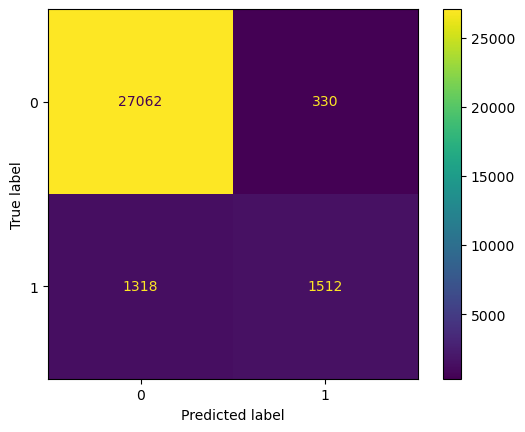

In [166]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_val_pred)

#### 7.5. Best Model on Test Data

In [167]:
y_test_pred = rf_best_ros.predict(X_test_concat)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [168]:
roc = roc_auc_score(y_test, y_test_pred)

print('ROC  :', roc)

ROC  : 0.770538938592937


In [169]:
# Create dataframe
# Create list of models and training types
model = ["Logistic Regression"]
auc_test = pd.DataFrame(index = training_set, columns = model)

# Add results to dataframe
auc_test.loc["Original", "Logistic Regression"] = auc(lr_best, X_test_concat, y_test)
auc_test.loc["RUS", "Logistic Regression"] = auc(lr_best_rus, X_test_concat, y_test)
auc_test.loc["ROS", "Logistic Regression"] = auc(lr_best_ros, X_test_concat, y_test)

auc_test

,Logistic Regression
Original,0.771543
RUS,0.771543
ROS,0.771543


In [170]:
result  = pd.crosstab(y_test_pred,
            y_test,
            margins = True)


result

class,0,1,All
row_0,,,
0,27076,1266,28342
1,317,1564,1881
All,27393,2830,30223


In [171]:
fpr = 309/(309+27084)
recall = 1563/(1563+1267)

print("FPR:", fpr)
print("Recall: ", recall)

FPR: 0.011280254079509364
Recall:  0.5522968197879858


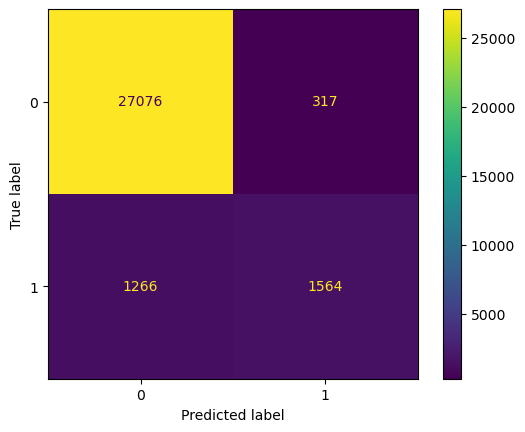

In [172]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)